## Recreate IPCC IPCC SPM.1

Panel a from https://www.ipcc.ch/report/ar6/wg1/figures/summary-for-policymakers/figure-spm-1/

Data source: https://catalogue.ceda.ac.uk/uuid/76cad0b4f6f141ada1c44a4ce9e7d4bd

In [1]:
from pathlib import Path


data_path = Path("v20210809")

In [2]:
import pandas as pd


recon = pd.read_csv(data_path.joinpath("panel_a", "SPM1_1-2000.csv"), index_col="year")
obs = pd.read_csv(data_path.joinpath("panel_a", "SPM1_1850-2020_obs.csv"), index_col="year")
t_max = pd.read_csv(data_path.joinpath("panel_a", "SPM1_6500_recon.csv"))

Text(1050, 1.7, 'Warming is unprecedented\nin more than 2000 years')

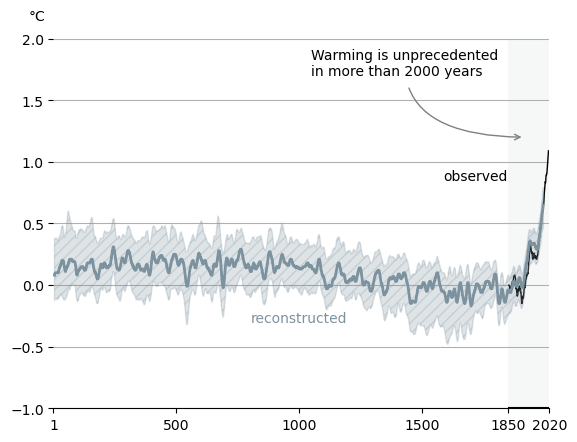

In [3]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots()

# Reconstructed
color = "#7d929f"
kw = {"hatch": "///", "zorder": 3, "alpha": 0.25, "color": color}

recon["temp"].plot(ax=ax, linewidth=2, color=color, zorder=3)
ax.fill_between(recon.index, recon["95%"], y2=recon["temp"], **kw)
ax.fill_between(recon.index, recon["5%"], y2=recon["temp"], **kw)

# Observed
obs["temp"].plot(ax=ax, linewidth=1, color="black", zorder=2)

# Axis
ax.set_ylim([-1, 2])
ax.set_yticks([-1, -0.5, 0, 0.5, 1, 1.5, 2])
ax.axvspan(1850, 2020, facecolor="#f6f7f7")
ax.grid(axis="y")

ax.set_xlim([1, 2020])
ax.set_xlabel("")
ax.set_xticks([1, 500, 1000, 1500, 1850, 2020])
ax.hlines(y=-1, xmin=1850, xmax=2020, color="black")
ax.spines[["top", "right", "left"]].set_visible(False)

# Annotations
ax.text(-0.05, 1.05, "°C", transform=ax.transAxes)
ax.text(1000, -0.3, "reconstructed", color=color, horizontalalignment="center")
ax.text(1850, 0.85, "observed", color="black", horizontalalignment="right")

ax.annotate("Warming is unprecedented\nin more than 2000 years",
            xy=(1935, 1.2),
            xycoords="data",
            xytext=(1050, 1.7),
            textcoords="data",
            arrowprops={
                "arrowstyle": "->",
                "color": "0.5",
                "shrinkA":5,
                "shrinkB": 5,
                "connectionstyle": "angle3,angleA=90,angleB=0",
            })

# rect = plt.Rectangle(
#     (-100, t_max["5%"]), 50, t_max["95%"]-t_max["5%"],
#     facecolor=color, alpha=0.25,
# )
# ax.add_patch(rect)

In [4]:
fname = data_path.joinpath("panel_b", "gmst_changes_model_and_obs.csv")

In [5]:
!head -n 36 $fname

In [6]:
!tail -n 3 $fname

In [7]:
names = [
    "Year",
    "gsta_brown_line_hist_ssp245",
    "gsta_brown_shading_bottom_hist_ssp245",
    "gsta_brown_shading_top_hist_ssp245",
    "gsta_green_line_hist_nat",
    "gsta_green_shading_bottom_hist_nat",
    "gsta_green_shading_top_hist_nat",
    "gsta_black_obs",
]

df = pd.read_csv(
    fname,
    skiprows=36,
    names=names,
    skipfooter=1,
    engine="python",
)


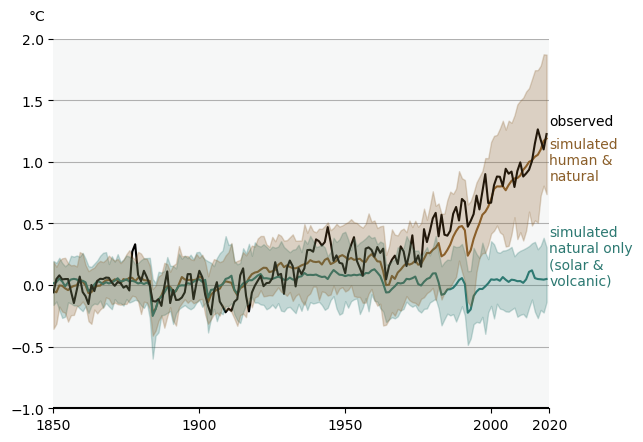

In [8]:
fig, ax = plt.subplots()

colors = {
    "brown": "#8b5f2a",
    "green": "#2d7972",
}

df.plot(ax=ax, x="Year", y="gsta_brown_line_hist_ssp245", color=colors["brown"])
df.plot(ax=ax, x="Year", y="gsta_green_line_hist_nat", color=colors["green"])
df.plot(ax=ax, x="Year", y="gsta_black_obs", color="black")

kw = {"zorder": 3, "alpha": 0.25}
ax.fill_between(
    df["Year"],
    df["gsta_green_shading_top_hist_nat"],
    y2=df["gsta_green_shading_bottom_hist_nat"],
    color=colors["green"],
    **kw,
)

ax.fill_between(
    df["Year"],
    df["gsta_brown_shading_top_hist_ssp245"],
    y2=df["gsta_brown_shading_bottom_hist_ssp245"],
    color=colors["brown"],
    **kw,
)

# Labels
ax.get_legend().remove()

# Annotations
ax.text(-0.05, 1.05, "°C", transform=ax.transAxes)
ax.text(2020, 1.30, "observed", color="black", horizontalalignment="left")
ax.text(2020, 0.85, "simulated\nhuman &\nnatural", color=colors["brown"], horizontalalignment="left")
ax.text(2020, 0, "simulated\nnatural only\n(solar &\nvolcanic)", color=colors["green"], horizontalalignment="left")

# Axis
ax.set_ylim([-1, 2])
ax.set_yticks([-1, -0.5, 0, 0.5, 1, 1.5, 2])
ax.axvspan(1850, 2020, facecolor="#f6f7f7")
ax.grid(axis="y")

ax.spines[["top", "right", "left"]].set_visible(False)
ax.set_xlim([1850, 2020])
ax.set_xlabel("")
ax.set_xticks([1850, 1900, 1950, 2000, 2020])
ax.hlines(y=-1, xmin=1850, xmax=2020, color="black");